In [86]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../funcs')
from xarray_tools import find_cor_ts

In [2]:
dss = {fp.stem: xr.open_dataset(fp) for fp in Path('~/scratch/coherence/uavsar').expanduser().glob('*_tau.nc')}

In [69]:
# for pol in ['VV']:
#     print(pol)
#     res = pd.DataFrame()
#     for stem, ds in dss.items():
#         times = find_cor_ts(ds)
#         print(stem)
#         for heading, t1, t2 in times:
#             df = ds.sel(heading = heading, time1 = t1, time2 = t2).isel(x = slice(0, -1, 10), y = slice(0, -1, 10)).drop_vars(['curvefit_covariance','model_sd','model_swe','model_melt']).drop_dims(['cov_i', 'cov_j','model_time']).sel(param = 'tau', pol = pol).to_dataframe()
#             df = df.dropna(subset = ['cor'])
#             df['site'] = stem.replace('_tau', '')
#             res = pd.concat([df, res])
#     res.to_parquet(Path(f'~/scratch/coherence/uavsar/{pol}_10.parq').expanduser())

VV
rockmt_v3_tau
alamos_v3_tau
grmesa_v3_tau
uticam_v3_tau
dorado_v3_tau
irnton_v3_tau
silver_v3_tau
fraser_v3_tau
lowman_v3_tau
stlake_v3_tau
sierra_v3_tau


In [152]:
res = pd.DataFrame()
for stem, ds in dss.items():
    print(stem)
    times = find_cor_ts(ds)
    for heading, t1, t2 in times:
        df = ds.sel(heading = heading, time1 = t1, time2 = t2).isel(x = slice(0, -1, 10), y = slice(0, -1, 10))['cor'].to_dataframe()
        df = df.dropna(subset = ['cor'])
        df['site'] = stem.replace('_tau', '')
        res = pd.concat([df, res])
# res.to_parquet(Path(f'~/scratch/coherence/uavsar/{pol}_10.parq').expanduser())

rockmt_v3_tau
rockmt_v3_tau
alamos_v3_tau
alamos_v3_tau
grmesa_v3_tau
grmesa_v3_tau
uticam_v3_tau
uticam_v3_tau
dorado_v3_tau
dorado_v3_tau
irnton_v3_tau
irnton_v3_tau
silver_v3_tau
silver_v3_tau
fraser_v3_tau
fraser_v3_tau
lowman_v3_tau
lowman_v3_tau


KeyboardInterrupt: 

KeyError: 'pol'

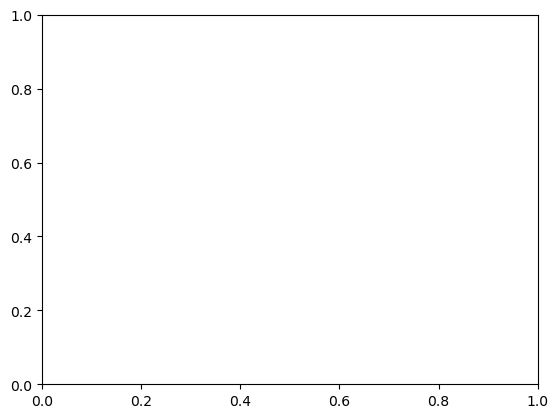

In [154]:
fig, ax= plt.subplots()
def add_temporal_hists(ax):
    cmap = plt.colormaps['plasma']
    for i, (low, high) in enumerate([[0,1], [5,10], [10, 15], [15, 20], [20, 25],[25, 100]]):
        sns.kdeplot(res.loc[(res['delta_t'] < high) & (res['delta_t'] >= low) & (res['pol'] == 'HH')]['cor'].values, label = f'{low}-{high} Days', color = plt.colormaps['Set2'](i), ax= ax)
    plt.legend()
add_temporal_hists(ax)